In [51]:
import webrtcvad
import os
import sys
import sox
import shutil
from operator import itemgetter
from itertools import groupby
import numpy as np
import shutil 
import pandas as pd
from scipy import stats
import glob
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ranksums

import os
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import glob
import matplotlib.pyplot as plt
import statsmodels

import statsmodels.api as sm

from scipy.stats import ranksums

In [52]:
def delete_multiple_element(list_object, indices):
    indices = sorted(indices, reverse=True)
    for idx in indices:
        if idx < len(list_object):
            list_object.pop(idx)
            
    return list_object



def kruskal(f, task, c, p, c_name, p_name):
    for i, title in enumerate(task):
        nome = title
        f.write(('\n'+ f'kruskal results for {title} {c_name} {p_name} {stats.kruskal(c[i], p[i]).pvalue} \n\n'))
        
        

In [53]:
def read_stats_test(file):
    
    with open(file, 'r') as f:
        lista = []
        testo = f.readlines()
        testo = [line.strip("\n") for line in testo]

        for line in testo:
            if line=="":
                pass
            else:
                lista.append(line)
                
    return lista

In [54]:
def holm_correction(kruskal):
    
    line_to_remove=[]
    values=[]
    corrected =[]
    final = []
    for l in kruskal:
        if "nan" in l:
            line_to_remove.append(kruskal.index(l))
    
    new_krusk = delete_multiple_element(kruskal, line_to_remove)
            
    for line in new_krusk:
        ok = line.split('vs.')[1]
        num = ok.split(" ")[2]
        values.append(float(num))
   # values = [x for x in values if isnan(x) == False]
    result = statsmodels.stats.multitest.fdrcorrection(values, alpha=0.05, method='indep', is_sorted=False)
    num = np.where(result[0] == True)
    list_index = ((num)[0]).tolist()

    for i in list_index:
        corrected.append(result[1][i])
    for i in list_index:
        final.append(kruskal[i])
    
    return final, corrected
  

In [55]:

#df_30msec = pd.read_csv("/export/b15/afavaro/Frontiers/submission/Statistical_Analysis/GITA/Acoustic/Prosody/prosody_features_2022-10-25-17-33-07.csv")
df_30msec = pd.read_csv("/export/b15/afavaro/Frontiers/submission/Statistical_Analysis/GITA/Acoustic/Prosody/pause.csv")
df_30msec = df_30msec.drop(columns=['Unnamed: 0'])
df_30msec= df_30msec.dropna()
df_30msec['label']=df_30msec['AudioFile'].str.split('_').str[0]
tasks = []
names =df_30msec['AudioFile'].tolist()
for e in names:
    ok = e.split("_", 2)[2]
    ok = ok.split("_", 1)[0].split(".wav")[0]
    tasks.append(ok)
df_30msec['tasks'] = tasks
df = df_30msec



In [56]:
tasks = df.groupby("tasks")
monologue = tasks.get_group("monologue")
laura = tasks.get_group("laura")
rosita = tasks.get_group("rosita")
micasa = tasks.get_group("micasa")
loslibros = tasks.get_group("loslibros")
luisa = tasks.get_group("luisa")
readtext = tasks.get_group("readtext")
TDU = pd.concat([laura, rosita, micasa, loslibros, luisa  ])

## Read Passage 

In [57]:
grouped = readtext.groupby("label")
control = grouped.get_group("HC") 
parkinson_ = grouped.get_group("PD")

task = readtext.columns[:-3].values.tolist()
parkinson_all_feat = np.array([parkinson_[feat] for feat in np.array(readtext.columns[:-3])])
control_all_feat = np.array([control[feat] for feat in np.array(readtext.columns[:-3])])


with open('/export/b15/afavaro/Frontiers/submission/COLOMBIAN/Results/read_pause.txt', 'w') as f:
 
    kruskal(f, task, control_all_feat, parkinson_all_feat, "controls vs.", "parkinson")
    

kruskal_1 = read_stats_test('/export/b15/afavaro/Frontiers/submission/COLOMBIAN/Results/read_pause.txt')
holm_correction(kruskal_1)


([], [])

## Monologue

In [58]:

grouped = monologue.groupby("label")
control = grouped.get_group("CN") 
parkinson_ = grouped.get_group("PD")

task = monologue.columns[:-3].values.tolist()
parkinson_all_feat = np.array([parkinson_[feat] for feat in np.array(monologue.columns[:-3])])
control_all_feat = np.array([control[feat] for feat in np.array(monologue.columns[:-3])])

with open('/export/b15/afavaro/Frontiers/submission/COLOMBIAN/Results/monologue_pause.txt', 'w') as f:
 
    kruskal(f, task, control_all_feat, parkinson_all_feat, "controls vs.", "parkinson")
    

kruskal_1 = read_stats_test('/export/b15/afavaro/Frontiers/submission/COLOMBIAN/Results/monologue_pause.txt')
holm_correction(kruskal_1)



([], [])

/home/afavaro/new_conda/lib/python3.9/site-packages/seaborn/axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)


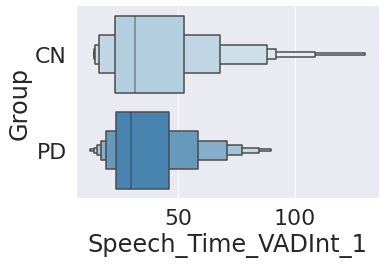

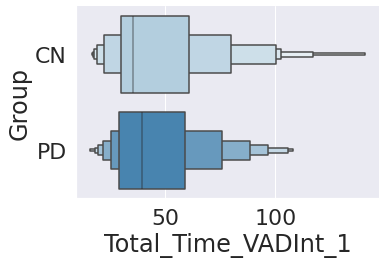

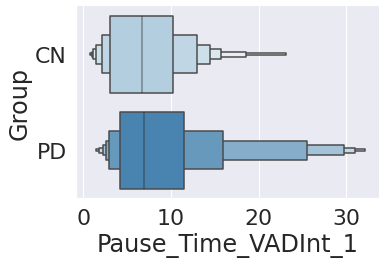

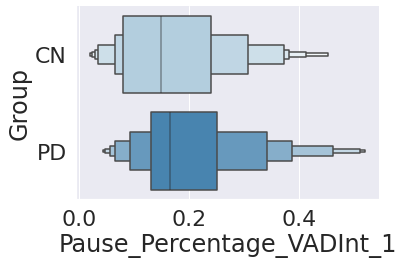

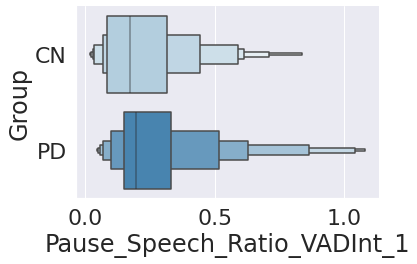

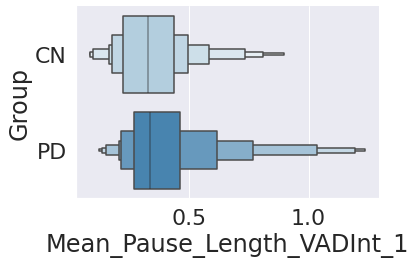

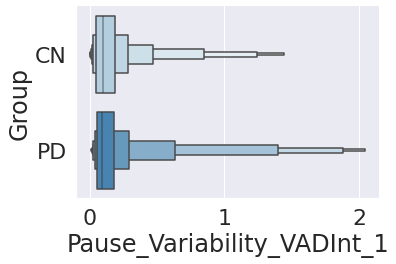

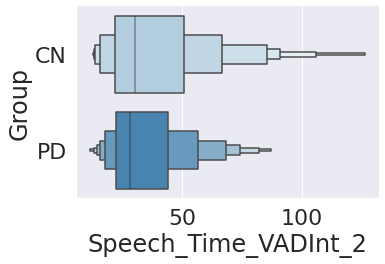

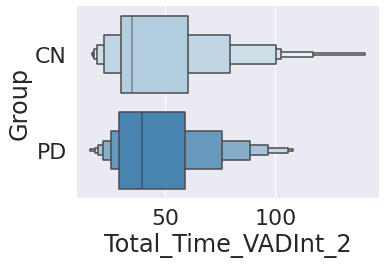

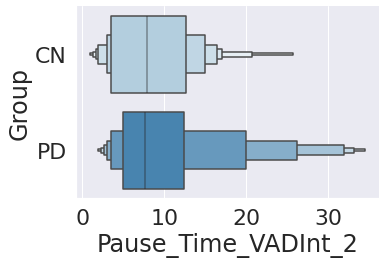

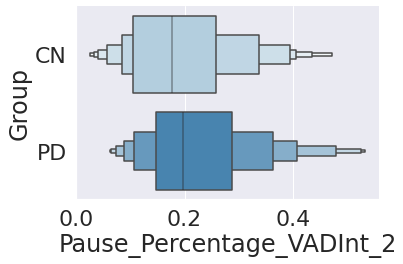

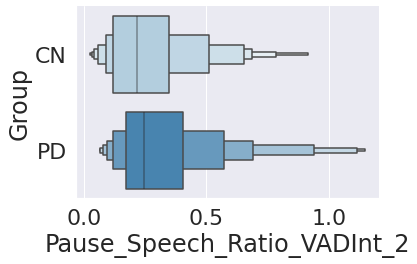

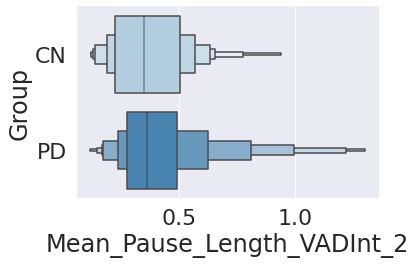

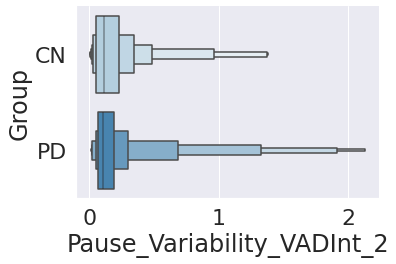

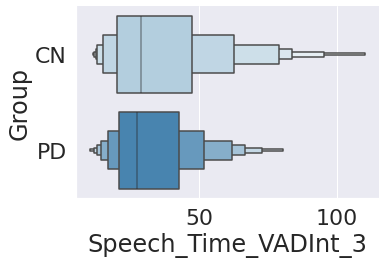

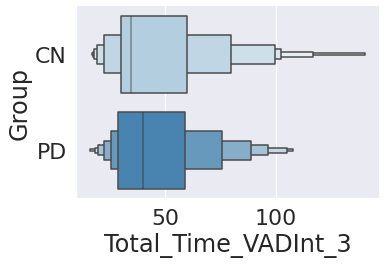

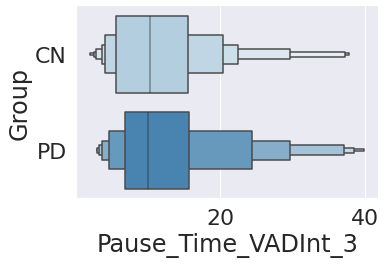

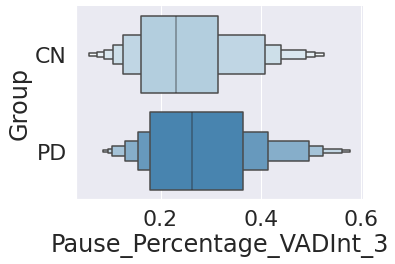

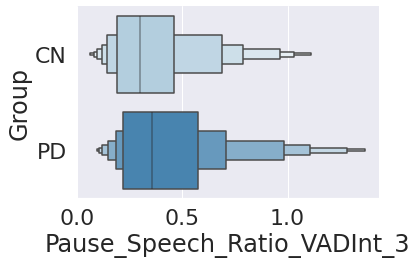

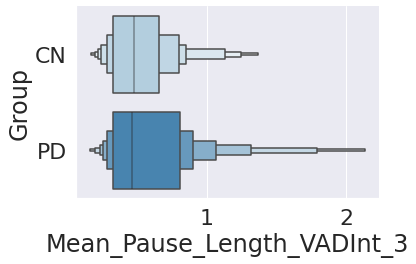

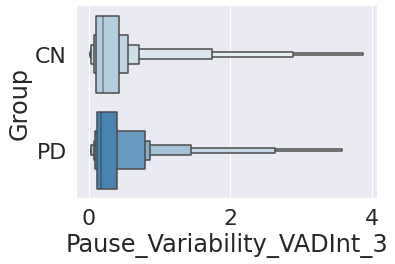

In [59]:
for i, title in enumerate(task):  
    
    nome = title
   
    controls = []
    parkinson=[]
    
    data = np.concatenate([control_all_feat[i], parkinson_all_feat[i]])
    data = data.tolist()
    data = [float(x) for x in data if x != "None"]


    [controls.append('CN') for value in range(len(control_all_feat[i]))]
   
    [parkinson.append('PD') for value in range(len(parkinson_all_feat[i]))]
   
    lista = controls+parkinson
    
    dict = {nome: data, 'Group': lista} 
    df = pd.DataFrame(dict)
    
    sns.set(font_scale=2)
    sns.catplot(x=nome, y="Group", kind="boxen", data=df, k_depth='full', palette="Blues",\
               height=4.2, aspect=1.4, showfliers = False)
    
    #plt.savefig(f'/export/b15/afavaro/Frontiers/submission/COLOMBIAN/Acoustic/Plots/read_{nome}.png', facecolor='white', dpi=600)

## Text Dependent Utterances (TDU)

In [60]:
grouped = TDU.groupby("label") #here we extract the values by category

control = grouped.get_group("CN") 
parkinson_ = grouped.get_group("PD")

task = TDU.columns[:-3].values.tolist()
parkinson_all_feat = np.array([parkinson_[feat] for feat in np.array(TDU.columns[:-3])])
control_all_feat = np.array([control[feat] for feat in np.array(TDU.columns[:-3])])


with open('/export/b15/afavaro/Frontiers/submission/COLOMBIAN/Results/TDU.txt', 'w') as f:
 
    kruskal(f, task, control_all_feat, parkinson_all_feat, "controls vs.", "parkinson")
    

kruskal_1 = read_stats_test('/export/b15/afavaro/Frontiers/submission/COLOMBIAN/Results/TDU.txt')
holm_correction(kruskal_1)

([], [])

/home/afavaro/new_conda/lib/python3.9/site-packages/seaborn/axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)


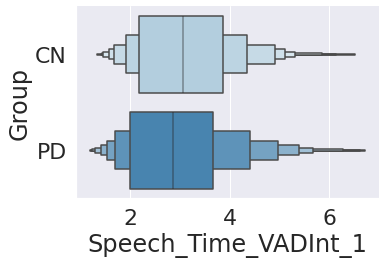

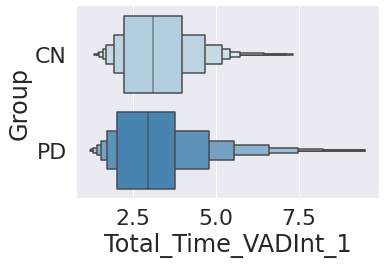

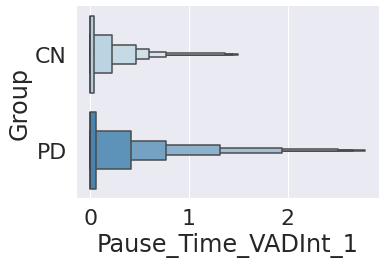

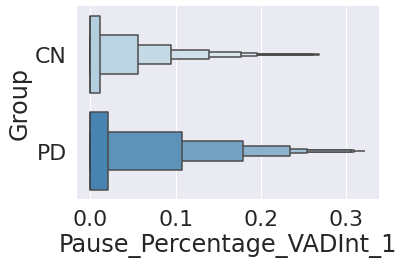

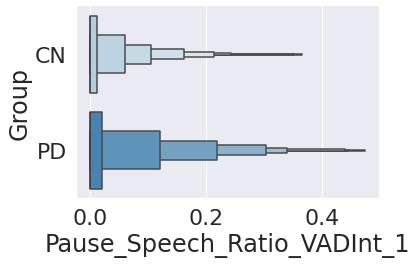

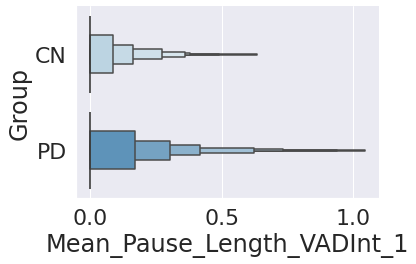

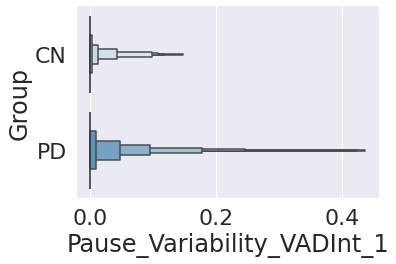

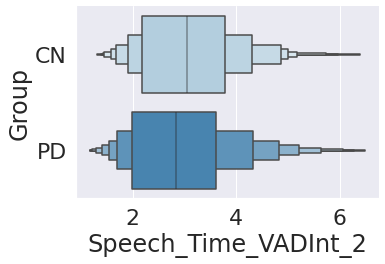

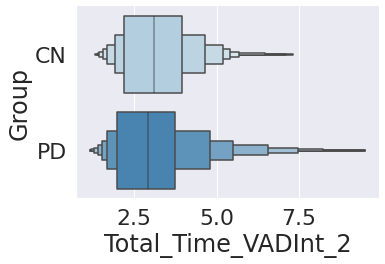

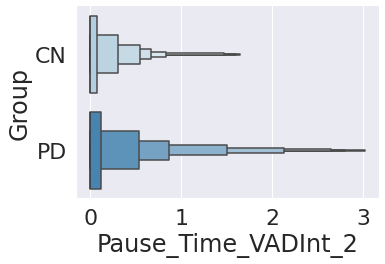

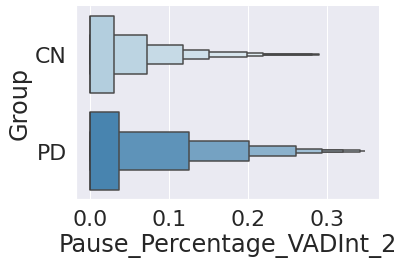

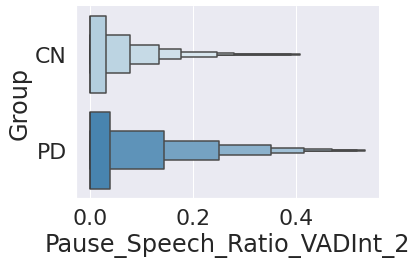

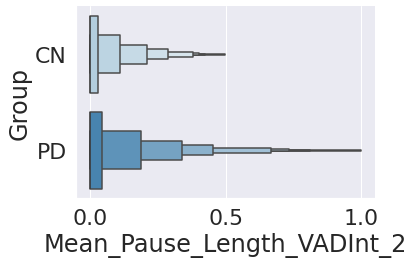

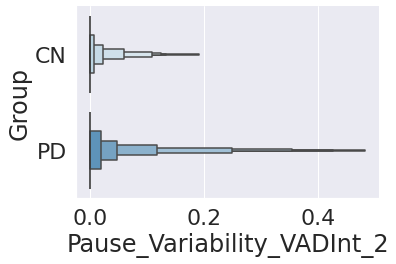

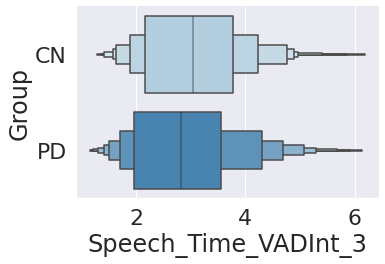

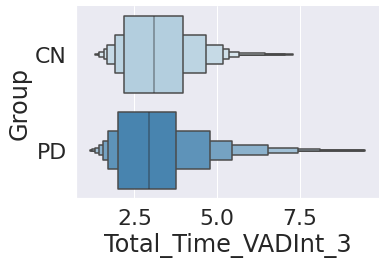

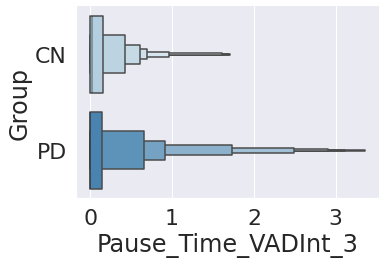

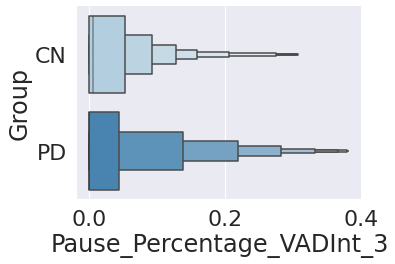

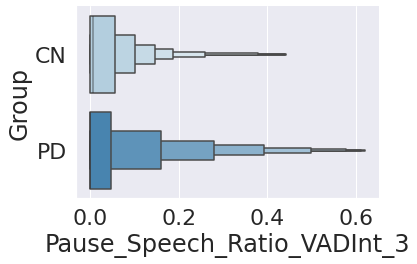

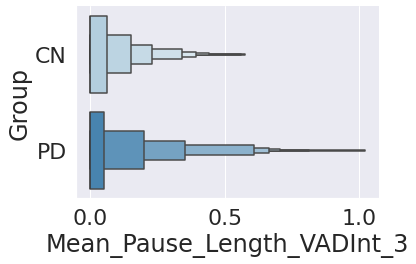

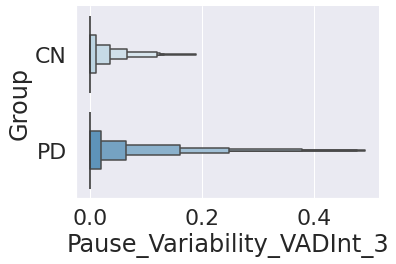

In [61]:
for i, title in enumerate(task):  
    
    nome = title
   
    controls = []
    parkinson=[]
    
    data = np.concatenate([control_all_feat[i], parkinson_all_feat[i]])
    data = data.tolist()
    data = [float(x) for x in data if x != "None"]


    [controls.append('CN') for value in range(len(control_all_feat[i]))]
   
    [parkinson.append('PD') for value in range(len(parkinson_all_feat[i]))]
   
    lista = controls+parkinson
    
    dict = {nome: data, 'Group': lista} 
    df = pd.DataFrame(dict)
    #tips = pd.DataFrame()
    #tips['task'] = data
    #tips['lista'] = lista
    
    sns.set(font_scale=2)
    sns.catplot(x=nome, y="Group", kind="boxen", data=df, k_depth='full', palette="Blues",\
               height=4.2, aspect=1.4, showfliers = False)
    
    #plt.savefig(f'/export/b15/afavaro/Frontiers/submission/COLOMBIAN/Acoustic/Plots/read_{nome}.png', facecolor='white', dpi=600)